# Table of contents:

### [Abstract](#1)

### [Exploring dataset](#2)

### [Target variable exploration](#3)

### [Creating training dataset](#4)

### [Models using Oversampling techniqe](#5):
   
   - [Random Forest](#5.1)
   - [Logistic Regression](#5.2)
   - [SVM](#5.4)


### [Models without Oversampling techniqe](#6):

   - [Random Forest](#6.1)
   - [Logistic Regression](#6.2)
   - [SVM](#6.3)

### [Comparing Models](#7)

### [Conclusion](#8)


# 1. Abstract<a name="1">

**Employee retention prediction problem:**

Hiring and retaining employees are extremely complex task that require capital, time and skills:

- Companies spend around 15/20% of the employee's salary to recuirt a new canditate.
- Hiring an employee costs an average of $7652 (for a middle size company).
- It takes around 52 days to fill a position.


Therefore, we will try to develop a model that **could predict which employees are more likely to leave the company**. 
For this dataset, firstly we have explored the dataset with some visualization, then we created different models techinques:
 - Random Forest. 
 - Logistic Regression (This model performed the best).
 - SVM.
 
The main problem encountered in this data set was an **inmbalance** dataset. For this we used the techinique SMOTE. However, at the end there there was not difference between using SMOTE technique. Logistic regression had the highest AUC, unlike SVM which performed the worst.
Since our data was imbalace, accuracy was not the best evaluation metric. Thefore, we preferred to used AUC curve for measuring the perfomance of our models. 


# 2. Exploring dataset <a name="2">

In [68]:
## Importing Libraries
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from category_encoders.one_hot import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import warnings

In [69]:
data = pd.read_csv("Human_Resources.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [70]:
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Checking missing values

In [6]:
data.isnull().mean()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

### Data visualization

C:\Users\Alexandra\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Alexandra\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Alexandra\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Alexandra\Anaconda3\lib\site-packages\pandas

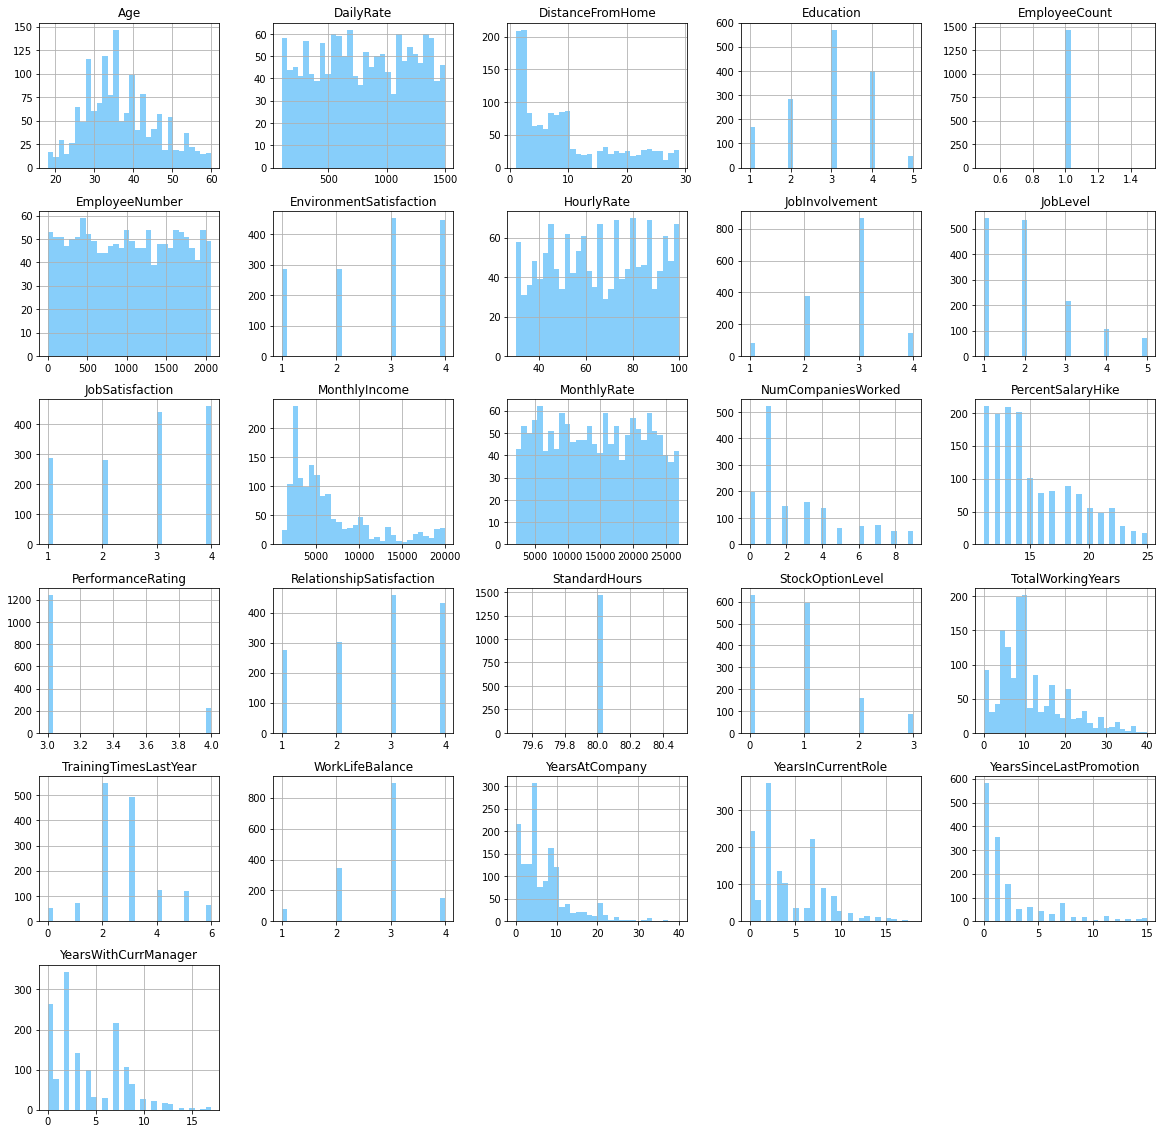

In [7]:
data.hist(bins=30, figsize=(20,20), color='lightskyblue')
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=UserWarning)

From the histograms we can see that we can **drop unnecessary variables** which are meaninful in our data analysis:
    
    - Over18
    - EmployeeCount
    - SdandardHours
    - EmployeeNumber

In [8]:
Cols_to_drop = ['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber']
data.drop(data[Cols_to_drop], axis=1, inplace= True)

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


##  3. Target variable exploration <a name="3">

In [10]:
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x =='Yes' else 0)
data_left = data[data['Attrition']==1]
data_stay = data[data['Attrition']==0]

In [11]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [12]:
data.Attrition.value_counts()/len(data)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

We can see that our targer variable it is unbalance. For modelling purposes we will use the techinique **Synthetic Minority Oversampling Techinique (SMOTE)** by the imbalance-learn Python library to creating more samples. 

In [13]:
data_stay.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [14]:
data_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000



From the above tables we can observe that for: 

- **Age** : Age's mean is higher for the employees who stay at the company thn those who left.
- **Daily rate**: we can observe that Daily rate is higher for the people who stay in the company.
- **Distance from home**: it is another factor that has significance on the workers to stay in the company. We can conclude that those who live closer to work, tendo to stay in the company.
- **Environment Satisfaction** is higher for those who stay at the company than those who leave.
- **Stock Options**: tend to be higher for those who stay within the company.




#### Correlation matrix

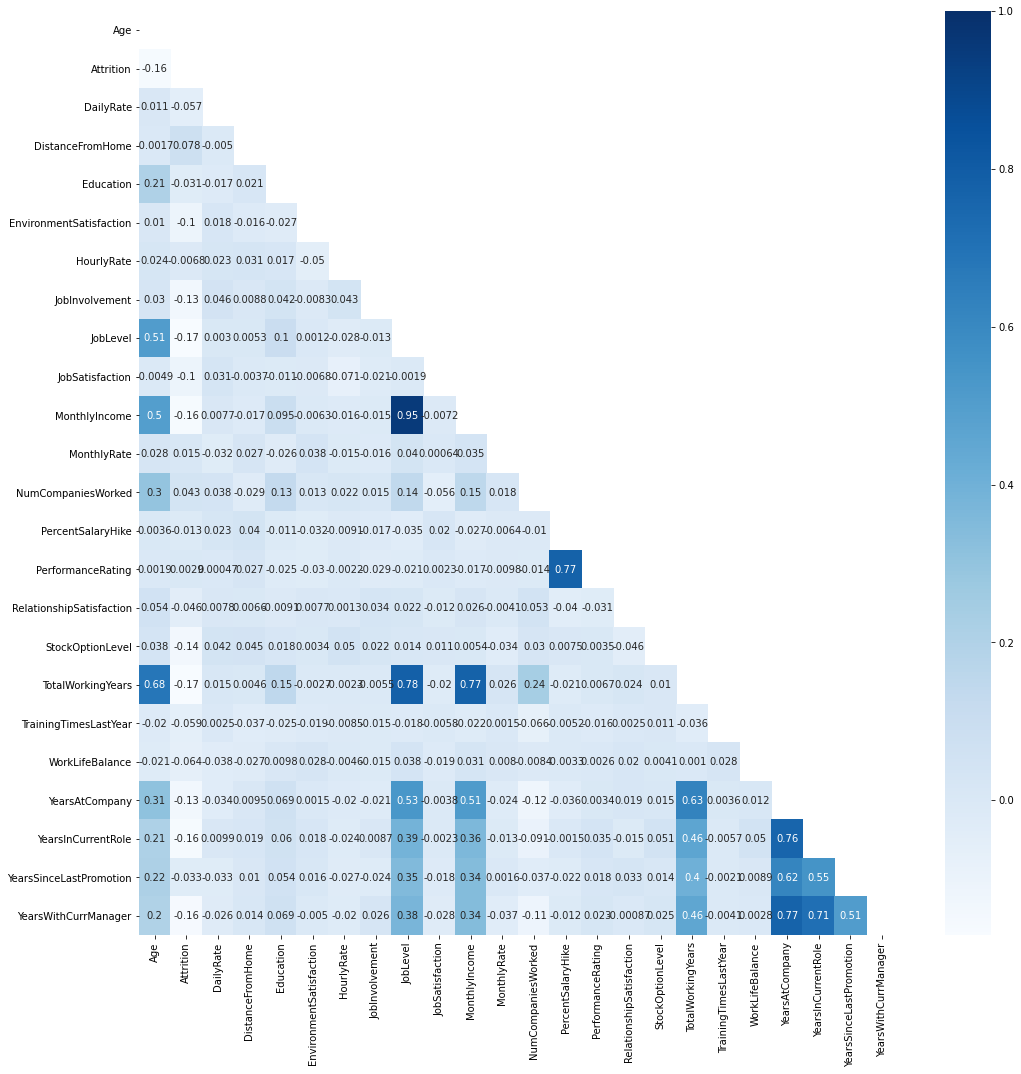

In [15]:
correlations = data.corr()

f, ax = plt.subplots(figsize=(17,17))
matrix = np.triu(correlations.corr())
sns.heatmap(correlations, annot= True,  mask=matrix, cmap='Blues')

We can observer that there is a high correlation between: 

- Job level and montly income. The higher job level you have, the higher salary you will get. 
- Total working years and years at the Company is also highly correlated with Job level and Income. This normal since the more years you spend in the company, the more relevant you become to them and therefore your job level increases over time as well as your salary. Higher salary always come with higher responsability.


However, if we observe in the below correlogram, we can observe tha our target variable has low correlatin with the other variables.


##### Correlation matrix with our target variable

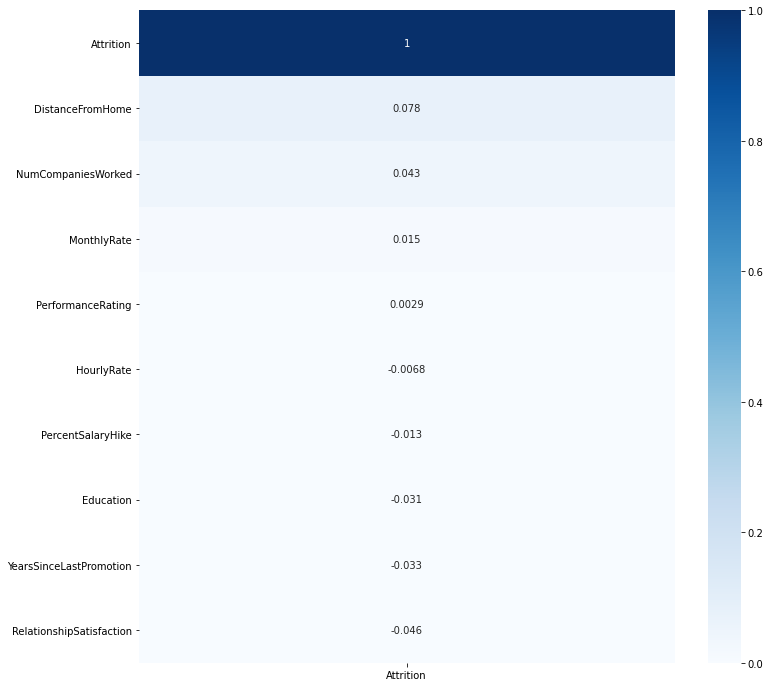

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr()[['Attrition']].sort_values('Attrition').tail(10),vmin=0, cmap='Blues', annot=True, ax=ax)
ax.invert_yaxis()

#### Target variable visualization with other important variables

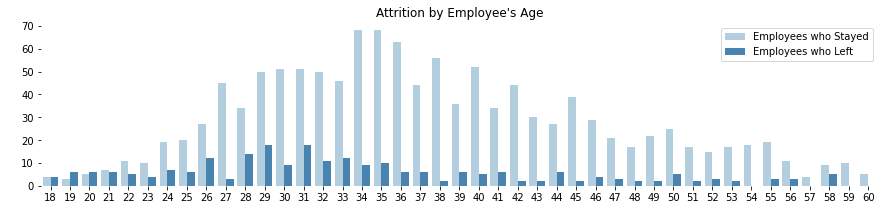

In [17]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(111)
sns.countplot(x='Age', hue='Attrition', data= data, palette="Blues")


#Removing lines from the graph

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

#Title

ax1.set_title("Attrition by Employee's Age", loc='center')
ax1.set_xlabel(" ")
ax1.set_ylabel(' ')

#Legend

line_labels = ["Employees who Stayed", "Employees who Left"]
ax1.legend(
    loc="upper right",
    labels=line_labels)   

We van observe that young people tend to leave the company. While there is a tendency for employeess to stay in the company between their late 20s and late 50s. 

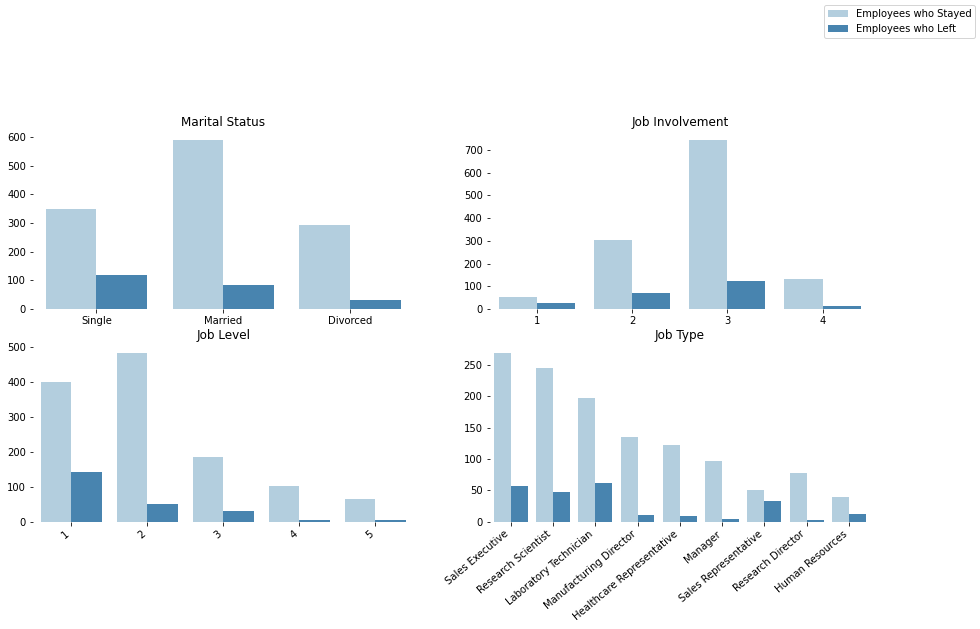

In [18]:
#Creating subplots
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3= fig.add_subplot(423)
ax4= fig.add_subplot(424)


sns.countplot(x='JobLevel', hue='Attrition', data= data, ax=ax3, palette="Blues",)
sns.countplot(x='JobInvolvement', hue='Attrition', data= data, ax=ax2,  palette="Blues")
sns.countplot(x='MaritalStatus', hue='Attrition', data= data, ax=ax1,  palette="Blues")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha='right')
sns.countplot(x='JobRole', hue='Attrition', data= data, ax=ax4,  palette="Blues")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha='right')

#Adding titles to the plots

ax3.title.set_text("Job Level")
ax2.title.set_text("Job Involvement")
ax1.title.set_text("Marital Status")
ax4.title.set_text("Job Type")

#Removing x labels and y labels

ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

#Removing lines from the graph

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)


ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)



#Legend

line_labels = ["Employees who Stayed", "Employees who Left"]
fig.legend(
    loc="upper right",
    labels=line_labels) 

From above visualization we can see that:
    
   - Marital status have a high significance between leaving or staying the company. Married employees tend to stay. 
   - The higher job involvement and Job Level, then employees tend to stay in the company.
   - There is also a high significance on leaving or staying the company depending the job type you perfom. 
  

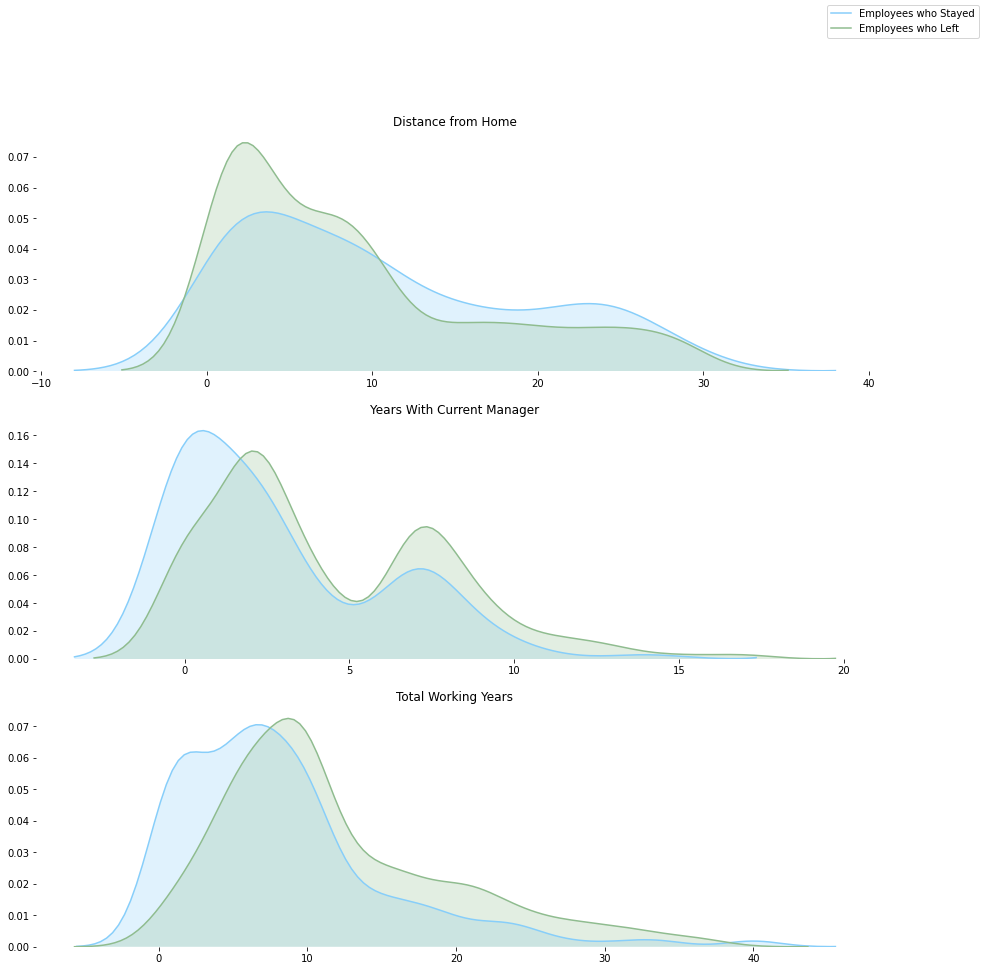

In [19]:
fig = plt.figure(figsize=(15,15))

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


sns.kdeplot(data_left['DistanceFromHome'], label = 'Employee who left', shade=True, color='lightskyblue', ax=ax1)
sns.kdeplot(data_stay['DistanceFromHome'], label = 'Employee who stayed', shade=True, color='darkseagreen', ax=ax1)


sns.kdeplot(data_left['YearsWithCurrManager'], label = 'Employee who left', shade=True, color='lightskyblue', ax=ax2)
sns.kdeplot(data_stay['YearsWithCurrManager'], label = 'Employee who stayed', shade=True, color='darkseagreen', ax=ax2)


sns.kdeplot(data_left['TotalWorkingYears'], label = 'Employee who left', shade=True, color='lightskyblue', ax=ax3)
sns.kdeplot(data_stay['TotalWorkingYears'], label = 'Employee who stayed', shade=True, color='darkseagreen', ax=ax3)


ax1.title.set_text("Distance from Home")
ax2.title.set_text("Years With Current Manager")
ax3.title.set_text("Total Working Years")



#Removing lines from the graph

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)


#Removing subplots legends

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()


#Legend

line_labels = ["Employees who Stayed", "Employees who Left"]
fig.legend(
    loc="upper right",
    labels=line_labels) 




- As the distance from home increases the employee tends to leave. 
- Employees tend to stay with current manager as we increase the years, specially between 5 and 15 years.
- If employees have betwen 0 and 7/9 working years, employees tend to leave. However, as total working years increases, employees tend to stay.

#### Exploring Gender gap

Text(0, 0.5, '')

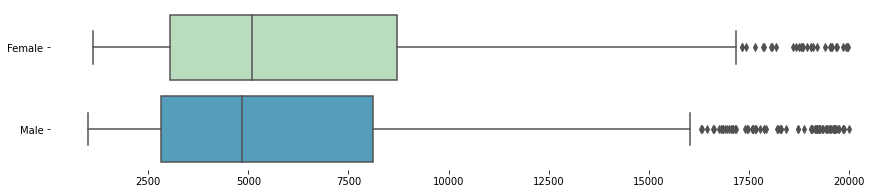

In [20]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(111)

sns.boxplot(x='MonthlyIncome', y='Gender', data=data, palette='GnBu')

#removing the borders of the chart 
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


#removing x and y labels

ax1.set_xlabel('')
ax1.set_ylabel('')

We can see from above boxplot that there isnot gender gap. We can see that on average females get pay even more. 

Text(0, 0.5, '')

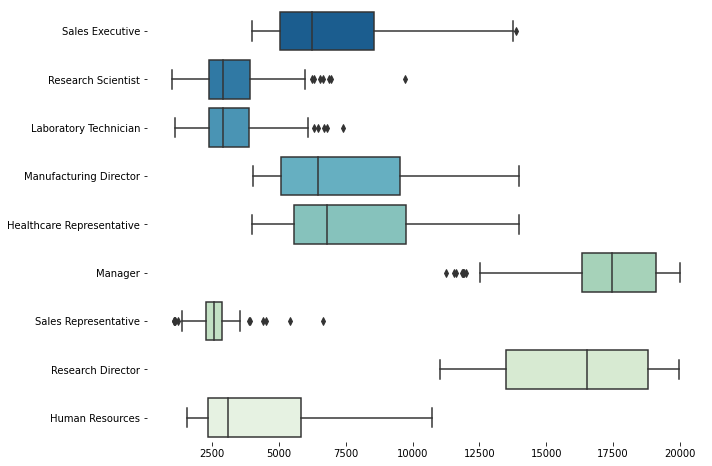

In [21]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

sns.boxplot(x='MonthlyIncome', y='JobRole', data=data, palette='GnBu_r')

#removing borders of the chart 
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


#removing x and y labels

ax1.set_xlabel('')
ax1.set_ylabel('')


Lastly, as we mentioned previosuly we saw that depending on the job type you performed, an employee was more likely to leave or stay. One of those roles were  **Sales Representative** and **Humand Resources**. One of the reason that might be is due to salary. We can observe that Sales represenative is the worst paid. 

## 4. Creating training dataset <a name="4">


In [22]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']


In [23]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

##### Long way without using Pipeline:


## 5. Models using Oversampling technique<a name="5">

#### Random Forest<a name="5.1">

In [61]:
#Transformin categorical columns
categorical_columns= data.select_dtypes(object).columns
# Using pipeline
steps = [('encoding', OneHotEncoder(cols=categorical_columns)),('over', SMOTE()),('model',RandomForestClassifier(random_state=5))]
pipeline = Pipeline(steps=steps)

In [62]:
stratified_kfold = StratifiedKFold(n_splits = 5, random_state=5)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [63]:
param_grid = {
    'model__n_estimators': [100, 500],
    'model__max_features':np.arange(2,32,2),
    'model__max_depth':[2,4]
    #'class_weight': ['balanced', 'balanced_subsample', {0:1, 1:1}, {0:1, 1:2}, {0:2, 1:1}],
#     'model__min_samples_split': [2,5],
#     'model__min_samples_leaf': [1,2]
}

In [64]:
RF = GridSearchCV(estimator = pipeline, param_grid=param_grid, cv=stratified_kfold.split(X,y), verbose=False, n_jobs=3, scoring='roc_auc')

In [65]:
RF.fit(X,y)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000280D46D11C8>,
             estimator=Pipeline(steps=[('encoding',
                                        OneHotEncoder(cols=Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))),
                                       ('over', SMOTE()),
                                       ('model',
                                        RandomForestClassifier(random_state=5))]),
             n_jobs=3,
             param_grid={'model__max_depth': [2, 4],
                         'model__max_features': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                         'model__n_estimators': [100, 500]},
             scoring='roc_auc', verbose=False)

In [72]:
AUC = RF.best_score_
best_param = RF.best_params_
print(f'Random Forest AUC: {round(AUC,2)}')
print(f'The best Parameter for Random Forest is: {best_param}')

Random Forest AUC: 0.81
The best Parameter for Random Forest is: {'model__max_depth': 4, 'model__max_features': 6, 'model__n_estimators': 100}


#### Logistic regression<a name="5.2">

In [30]:
#Transformin categorical columns
categorical_columns= data.select_dtypes(object).columns
# Using pipeline
steps = [('encoding', OneHotEncoder(cols=categorical_columns)),('over', SMOTE()),('model',LogisticRegression(random_state=5))]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits = 5, random_state=5)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [31]:
LRparam_grid = {
    'model__C': [0.001, 0.01, 0.1, 1],
    'model__penalty': ['l1', 'l2'],
    #'max_iter': list(range(100,800,100)),
    'model__solver': ['liblinear']
}

In [32]:

LR = GridSearchCV(estimator = pipeline, param_grid=LRparam_grid, cv=stratified_kfold.split(X, y), verbose=False, scoring='roc_auc')

In [33]:
LR.fit(X,y)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warning

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warning

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000280D40E66C8>,
             estimator=Pipeline(steps=[('encoding',
                                        OneHotEncoder(cols=Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))),
                                       ('over', SMOTE()),
                                       ('model',
                                        LogisticRegression(random_state=5))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear']},
             scoring='roc_auc', verbose=False)

In [71]:
AUC = LR.best_score_
best_param = LR.best_params_
print(f'Logistic regression AUC: {round(AUC,2)}')
print(f'The best Parameter for Logistic regression is: {best_param}')

Logistic regression AUC: 0.84
The best Parameter for Logistic regression is: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


#### SVM<a name="5.3">

In [35]:
#Transformin categorical columns
categorical_columns= data.select_dtypes(object).columns
# Using pipeline
steps = [('encoding', OneHotEncoder(cols=categorical_columns)),('over', SMOTE()),('model',SVC(random_state=5))]
pipeline = Pipeline(steps=steps)
stratified_kfold = StratifiedKFold(n_splits = 5, random_state=5)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [36]:
SVMparam_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__kernel' :['rbf'],
    'model__gamma': ['auto']
}

In [37]:

SVM = GridSearchCV(estimator = pipeline, param_grid=SVMparam_grid, cv=stratified_kfold.split(X, y), verbose=False, scoring='roc_auc')

In [38]:
SVM.fit(X,y)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warning

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000280D4A86EC8>,
             estimator=Pipeline(steps=[('encoding',
                                        OneHotEncoder(cols=Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))),
                                       ('over', SMOTE()),
                                       ('model', SVC(random_state=5))]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': ['auto'], 'model__kernel': ['rbf']},
             scoring='roc_auc', verbose=False)

In [39]:
AUC = SVM.best_score_
best_param = SVM.best_params_
print(f'SVM AUC: {round(AUC,2)}')
print(f'The best Parameter for SVM is: {best_param}')

SVM AUC: 0.51%
The best Parameter for SVM is: {'model__C': 0.1, 'model__gamma': 'auto', 'model__kernel': 'rbf'}


##  Models without Oversampling techniqe<a name="6">

#### Random forest<a name="6.1">

In [40]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [41]:
#Transformin categorical columns
categorical_columns= data.select_dtypes(object).columns
# Using pipeline
steps = [('encoding', OneHotEncoder(cols=categorical_columns)),('model',RandomForestClassifier(random_state=5))]
pipeline = Pipeline(steps=steps)

In [42]:
stratified_kfold = StratifiedKFold(n_splits = 5, random_state=5)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [43]:
param_grid = {
    'model__n_estimators': [100, 500, 1000],
    #'model__max_features':['auto', 'sqrt'],
    'model__max_depth':[2,4],
    #'class_weight': ['balanced', 'balanced_subsample', {0:1, 1:1}, {0:1, 1:2}, {0:2, 1:1}],
    'model__min_samples_split': [2,5],
    'model__min_samples_leaf': [1,2]
}

In [46]:
RF2 = GridSearchCV(estimator = pipeline, param_grid=param_grid, cv=stratified_kfold.split(X, y), verbose=2, n_jobs=3, scoring='roc_auc')

In [48]:
RF2.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   37.3s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  2.4min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000280D4A7FB48>,
             estimator=Pipeline(steps=[('encoding',
                                        OneHotEncoder(cols=Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))),
                                       ('model',
                                        RandomForestClassifier(random_state=5))]),
             n_jobs=3,
             param_grid={'model__max_depth': [2, 4],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 500, 1000]},
             scoring='roc_auc', verbose=2)

In [73]:
AUC = RF2.best_score_
best_param = RF2.best_params_
print(f'Random Forest AUC: {round(AUC,2)}')
print(f'The best Parameter for Random forest is: {best_param}')

Random Forest AUC: 0.8
The best Parameter for Random forest is: {'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 1000}


#### Logistic Regresion<a name="6.2">

In [50]:
#Transformin categorical columns
categorical_columns= data.select_dtypes(object).columns

# Using pipeline
steps = [('encoding', OneHotEncoder(cols=categorical_columns)),('model',LogisticRegression(random_state=5))]
pipeline = Pipeline(steps=steps)

stratified_kfold = StratifiedKFold(n_splits = 5, random_state=5)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [51]:
LRparam_grid = {
    'model__C': [0.001, 0.01, 0.1, 1],
    'model__penalty': ['l1', 'l2'],
    #'max_iter': list(range(100,800,100)),
    'model__solver': ['liblinear']
}

In [52]:

LR2 = GridSearchCV(estimator = pipeline, param_grid=LRparam_grid, cv=stratified_kfold.split(X, y), verbose=False, scoring='roc_auc')

In [53]:
LR2.fit(X,y)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000280D4A7FEC8>,
             estimator=Pipeline(steps=[('encoding',
                                        OneHotEncoder(cols=Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))),
                                       ('model',
                                        LogisticRegression(random_state=5))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear']},
             scoring='roc_auc', verbose=False)

In [74]:
AUC = LR2.best_score_
best_param = LR2.best_params_
print(f'Logistic regression AUC: {round(AUC,2)}')
print(f'The best Parameter for Logistic regression is: {best_param}')

Logistic regression AUC: 0.84
The best Parameter for Logistic regression is: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


#### SVM<a name="6.3">

In [55]:
#Transformin categorical columns
categorical_columns= data.select_dtypes(object).columns
# Using pipeline
steps = [('encoding', OneHotEncoder(cols=categorical_columns)),('model',SVC(random_state=5))]
pipeline = Pipeline(steps=steps)
stratified_kfold = StratifiedKFold(n_splits = 5, random_state=5)

C:\Users\Alexandra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [56]:
SVMparam_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__kernel' :['rbf'],
    'model__gamma': ['auto']
}

In [57]:

SVM2 = GridSearchCV(estimator = pipeline, param_grid=SVMparam_grid, cv=stratified_kfold.split(X, y), verbose=False, scoring='roc_auc')

In [58]:
SVM2.fit(X,y)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000280D4A97648>,
             estimator=Pipeline(steps=[('encoding',
                                        OneHotEncoder(cols=Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))),
                                       ('model', SVC(random_state=5))]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__gamma': ['auto'], 'model__kernel': ['rbf']},
             scoring='roc_auc', verbose=False)

In [81]:
AUC = SVM2.best_score_
best_param = SVM2.best_params_
print(f'SVM AUC: {round(AUC,2)}')
print(f'The best Parameter for SVM is: {best_param}')

SVM AUC: 0.5
The best Parameter for SVM is: {'model__C': 0.1, 'model__gamma': 'auto', 'model__kernel': 'rbf'}


## COMPARING MODELS:<a name="7">

###### USING OVERSAMPLING TECHNIQUE

In [80]:
AUC = RF.best_score_
best_param = RF.best_params_
print(f'Random Forest AUC: {round(AUC,2)}')
print(f'The best Parameter for Random forest is: {best_param}')

Random Forest AUC: 0.81
The best Parameter for Random forest is: {'model__max_depth': 4, 'model__max_features': 6, 'model__n_estimators': 100}


In [79]:
AUC = LR2.best_score_
best_param = LR2.best_params_
print(f'Logistic regression AUC: {round(AUC,2)}')
print(f'The best Parameter for Logistic regression is: {best_param}')

Logistic regression AUC: 0.84
The best Parameter for Logistic regression is: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [136]:
AUC = SVM.best_score_
best_param = SVM.best_params_
print(f'SVM AUC: {round(AUC,2)}')
print(f'The best Parameter for SVM is: {best_param}')

SVM AUC: 0.5%
The best Parameter for SVM is: {'model__C': 10, 'model__gamma': 'auto', 'model__kernel': 'rbf'}


###### NOT USING OVERSAMPLING TECHNIQUE

In [77]:
AUC = RF2.best_score_
best_param = RF2.best_params_
print(f'Random Forest AUC: {round(AUC,2)}')
print(f'The best Parameter for Random forest is: {best_param}')

Random Forest AUC: 0.8
The best Parameter for Random forest is: {'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 1000}


In [78]:
AUC = LR2.best_score_
best_param = LR2.best_params_
print(f'Logistic regression AUC: {round(AUC,2)}')
print(f'The best Parameter for Logistic regression is: {best_param}')

Logistic regression AUC: 0.84
The best Parameter for Logistic regression is: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [75]:
AUC = SVM2.best_score_
best_param = SVM2.best_params_
print(f'SVM AUC: {round(AUC,2)}')
print(f'The best Parameter for SVM is: {best_param}')

SVM AUC: 0.5
The best Parameter for SVM is: {'model__C': 0.1, 'model__gamma': 'auto', 'model__kernel': 'rbf'}


## CONCLUSION<a name="8">

- Since our data was imbalace, we preferred to used AUC curve as the measurment for our models. 
- Using oversampling technique did not improve our results.
- The best model to perform was Logistic Regessiong with 0.84 in AUC with the following parameters: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
- The worst model was SVM. We can see that SVM got 0.50 in AUC, therefore we can conclude that our model has no class separation capacity whatsoever.
